In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib.patches import Rectangle

def imageGenerator(batch_size=64):
    #generate batches of images and targets
    while True:
        #each epoch has no_of_batches
        for _ in range(50):
            X = np.zeros((batch_size,100,100,3))
            Y = np.zeros((batch_size,4))

            for i in range(batch_size):
                # make the boxes and store their location in target
                row0 = np.random.randint(90)
                col0 = np.random.randint(90)
             #atleast 10 size ke box ka scope dene ke liye humne yaha 90 liya h
                row1 = np.random.randint(row0,100)
                col1 = np.random.randint(col0,100)
                X[i,row0:row1, col0:col1,:] = 1
                Y[i,0] = row0/100
                Y[i,1] = col0/100
                Y[i,2] = (row1-row0)/100
                Y[i,3] = (col1-col0)/100

            yield X,Y

vgg = tf.keras.applications.VGG16(
    input_shape=[100,100,3],include_top=False,weights='imagenet'
)

x = Flatten()(vgg.output)
x = Dense(4,activation='sigmoid')(x)
model = Model(vgg.input,x)

model.compile(loss='binary_crossentropy',optimizer = 'adam')

print('done 1')

model.fit_generator(imageGenerator(),steps_per_epoch=50,epochs = 5)



58889256/58889256 [==============================] - 0s 0us/step
done 1
Epoch 1/5


<ipython-input-1-769860e4c279>:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(imageGenerator(),steps_per_epoch=50,epochs = 5)


50/50 [==============================] - 23s 169ms/step - loss: 0.6779
Epoch 2/5
50/50 [==============================] - 9s 170ms/step - loss: 0.5174
Epoch 3/5
50/50 [==============================] - 9s 172ms/step - loss: 0.5094
Epoch 4/5
50/50 [==============================] - 9s 172ms/step - loss: 0.5045
Epoch 5/5
50/50 [==============================] - 9s 175ms/step - loss: 0.5079


In [2]:

def plot_preds():
    x = np.zeros((100,100,3))
    row0 = np.random.randint(90)
    col0 = np.random.randint(90)
    row1 = np.random.randint(row0,100)
    col1 = np.random.randint(col0,100)
    x[row0:row1,col0:col1,:]= 1
    X = np.expand_dims(x,0)
    p = model.predict(X)[0]
    fig,ax= plt.subplots(1)
    ax.imshow(x)
    rect = Rectangle(
        (p[1]*100,p[0]*100 ),
        p[3]*100,p[2]*100,linewidth = 1,edgecolor='r'  )
    ax.add_patch(rect)
    plt.show()


1/1 [==============================] - 1s 923ms/step


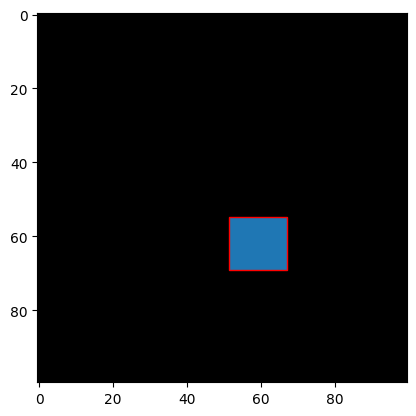

In [3]:

plot_preds()
